Import Libraries and view the sample grid image from the robot point of view

<IPython.core.display.Javascript object>


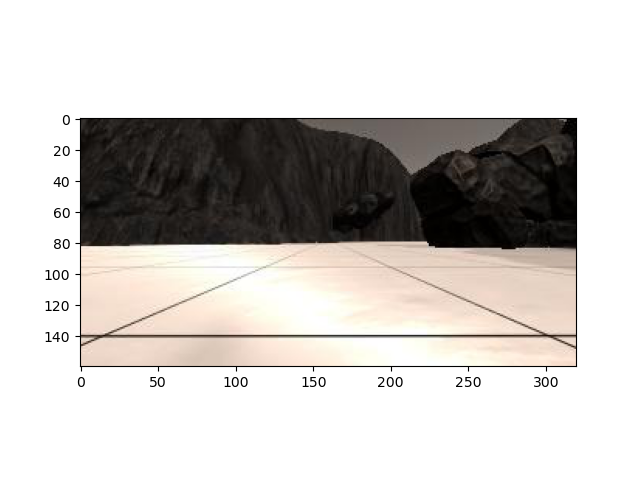

In [1]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
# Uncomment the next line for use in a Jupyter notebook
# This enables the interactive matplotlib window
%matplotlib notebook
image = mpimg.imread('robocam_grid.jpg')
plt.imshow(image)
plt.show() 

From the image select the four points of a square in the robot camera view. Then using opencv deform the image to be on a flat surface and each square in the robot camera is mapped to a flat square in the deformed image

<IPython.core.display.Javascript object>


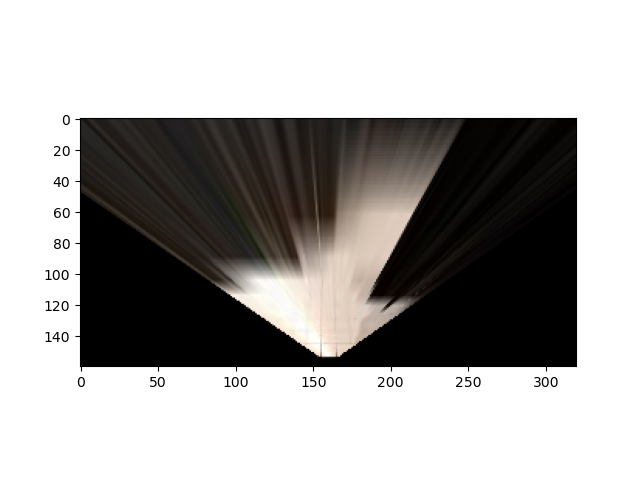

In [2]:
import cv2
import numpy as np

def perspect_transform(img, src, dst):

    # Get transform matrix using cv2.getPerspectivTransform()
    M = cv2.getPerspectiveTransform(src, dst)
    # Warp image using cv2.warpPerspective()
    # keep same size as input image
    warped = cv2.warpPerspective(img, M, (img.shape[1], img.shape[0]))
    # Return the result
    return warped

# Define source and destination points
dst_size = 5
bottom_offset = 6
source = np.float32([[15,140], [300,140],[200,95], [120,95]])
destination = np.float32([[image.shape[1]/2 - dst_size, image.shape[0] - bottom_offset],
                  [image.shape[1]/2 + dst_size, image.shape[0] - bottom_offset],
                  [image.shape[1]/2 + dst_size, image.shape[0] - 2*dst_size - bottom_offset], 
                  [image.shape[1]/2 - dst_size, image.shape[0] - 2*dst_size - bottom_offset],
                  ])     

warped = perspect_transform(image, source, destination)
%matplotlib notebook
plt.imshow(warped)
plt.show() 